# Propiedades dieléctricas de materiales 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
PLT18CO=np.loadtxt('PLT18CO.DAT') 
PLT18CC=np.loadtxt('PLT18CC.DAT') 

PLT22CO=np.loadtxt('PLT22CO.DAT') 
PLT22CC=np.loadtxt('PLT22CC.DAT')

template=pd.read_csv('template.csv')

Cols=template.keys()
Cols= [s.replace('K', 'k') for s in Cols]

PLT18CO=pd.DataFrame(PLT18CO, columns=Cols)
PLT18CC=pd.DataFrame(PLT18CC, columns=Cols)
PLT22CO=pd.DataFrame(PLT22CO, columns=Cols)
PLT22CC=pd.DataFrame(PLT22CC, columns=Cols)

In [3]:
PLT22CO.describe()

,e'100Hz,e'200Hz,e'300Hz,e'500Hz,e'700Hz,e'1kHz,e'2kHz,e'3kHz,e'5kHz,e'7kHz,...,e''300kHz,e''500kHz,e''700kHz,e''1MHz,e''2MHz,e''3MHz,e''5MHz,e''7MHz,e''10MHz,temp
count,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000
mean,1.025701e-08,3.108076e-08,3.906262e-08,3.226543e-08,4.599639e-08,4.653594e-08,6.470150e-08,8.281587e-08,1.250259e-07,2.031813e-07,...,0.000883,0.001466,0.002047,0.002915,0.005783,0.008615,0.014123,0.019355,0.026538,74.71300
std,2.484959e-07,6.205238e-07,7.363140e-07,4.289067e-07,6.345973e-07,4.360487e-07,3.856079e-07,4.894460e-07,7.874427e-07,5.741003e-07,...,0.000928,0.001546,0.002163,0.003087,0.006154,0.009190,0.015111,0.020747,0.028672,73.71103
min,-9.183920e-09,-2.587280e-09,-6.173440e-09,-1.842430e-09,-4.559080e-09,-3.358790e-09,-4.670000e-08,-1.229020e-07,-3.057720e-07,-1.735180e-07,...,0.000010,0.000024,0.000014,0.000019,0.000052,0.000044,0.000067,0.000088,0.000117,24.10000
25%,-8.576545e-10,3.645758e-09,6.466188e-09,1.156377e-08,1.647030e-08,2.428578e-08,4.567037e-08,6.322493e-08,8.395755e-08,1.150180e-07,...,0.000487,0.000806,0.001124,0.001598,0.003158,0.004697,0.007678,0.010499,0.014303,26.10000
50%,-4.560110e-10,4.109900e-09,6.985030e-09,1.217160e-08,1.737100e-08,2.549755e-08,4.770415e-08,6.661140e-08,1.069300e-07,1.804065e-07,...,0.000517,0.000855,0.001192,0.001694,0.003351,0.004983,0.008150,0.011145,0.015186,35.60000
75%,-2.137413e-11,5.551660e-09,9.119417e-09,1.545003e-08,2.156055e-08,3.159170e-08,5.809230e-08,8.016847e-08,1.280635e-07,2.146687e-07,...,0.000729,0.001208,0.001683,0.002390,0.004725,0.007048,0.011541,0.015851,0.021673,93.82500
max,6.085160e-06,1.520440e-05,1.804370e-05,1.051670e-05,1.555970e-05,1.069630e-05,9.429610e-06,1.192220e-05,1.911310e-05,1.360200e-05,...,0.005314,0.008846,0.012370,0.017645,0.035130,0.052416,0.086056,0.117972,0.162818,295.10000


vamos a graficar sólo para las frecuencias: (1k, 10k, 100k, 1M) Hz 

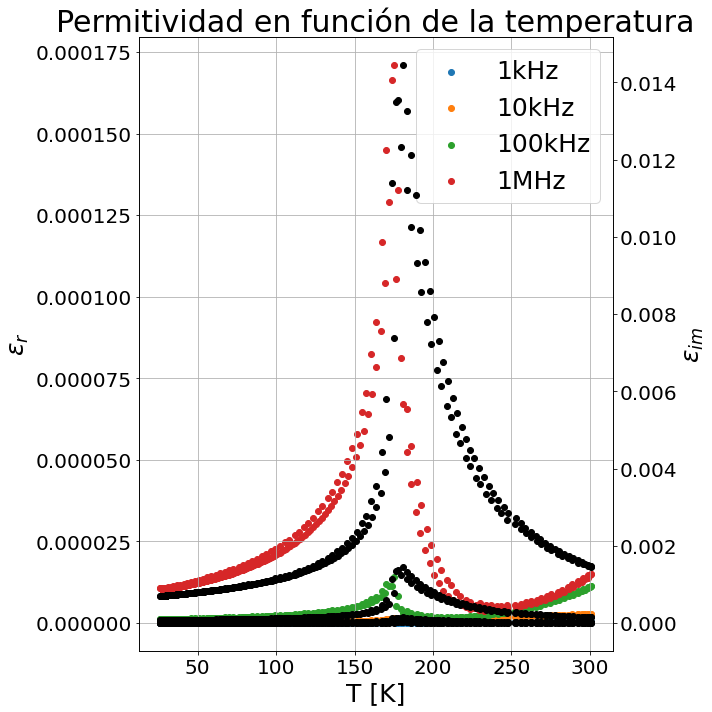

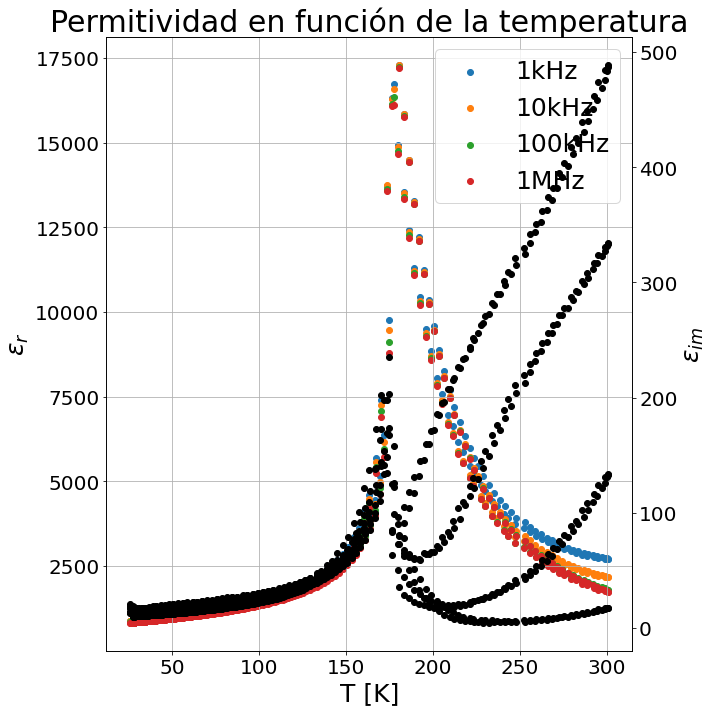

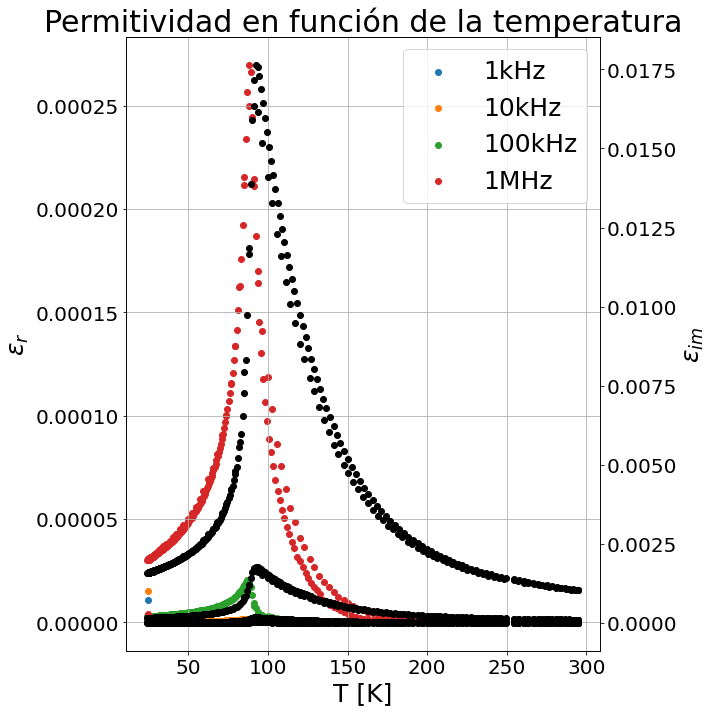

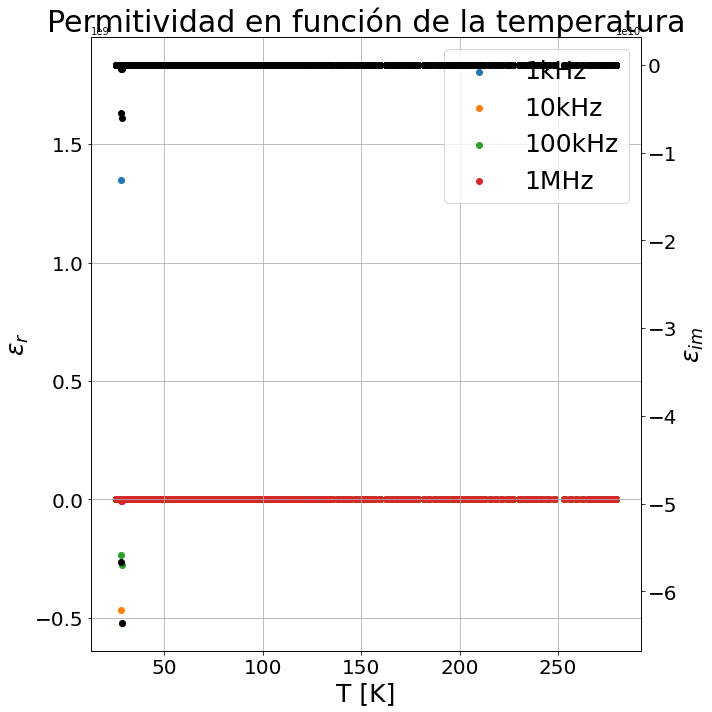

In [4]:
U=[PLT18CO, PLT18CC , PLT22CO, PLT22CC]

for u in U: 
    
    H=['1k','10k', '100k', '1M']
    
    fig, ax=plt.subplots(1,1, figsize=(10,10))

    ax2=ax.twinx()  #comando para usar dos ejes en el mismo gráfico. 

    for i in H:  
        ax.scatter(u["temp"],u["e'{}Hz".format(i)], label="{}Hz".format(i)) 
        ax2.scatter(u["temp"],u["e''{}Hz".format(i)], c='k')

    ax.set_xlabel('T [K]', fontsize=25)
    ax.set_ylabel(r'$\epsilon_r$', fontsize=25)
    ax2.set_ylabel(r'$\epsilon_{im}$', fontsize=25)
    ax.set_title(r'Permitividad en función de la temperatura', fontsize=30)

    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='y', labelsize=20)

    ax.grid()
    ax.legend(loc='best', fontsize=25)
    plt.tight_layout()  


   
plt.show()

En los datos vemos que hay datos de bajada y subida. Vamos a elegir sólo los de subida. Además trabajaremos solo con las copias.

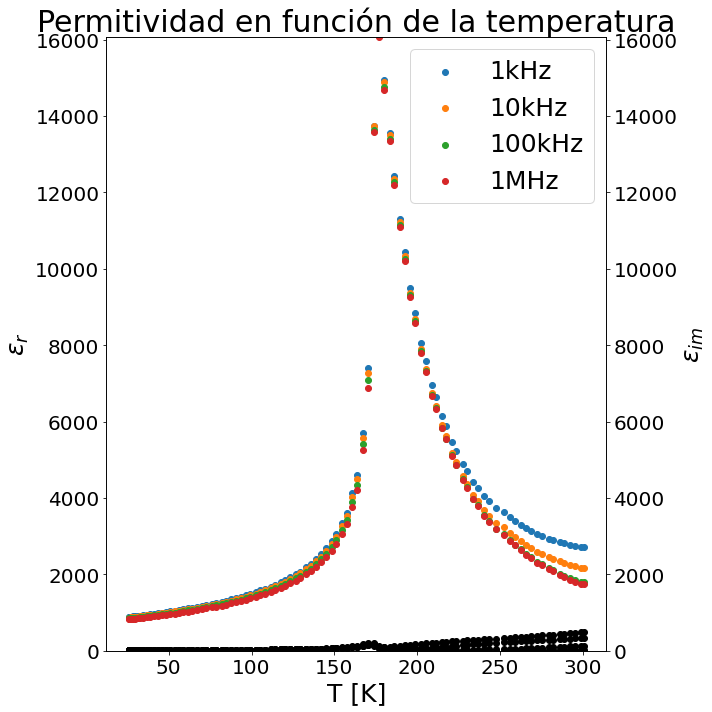

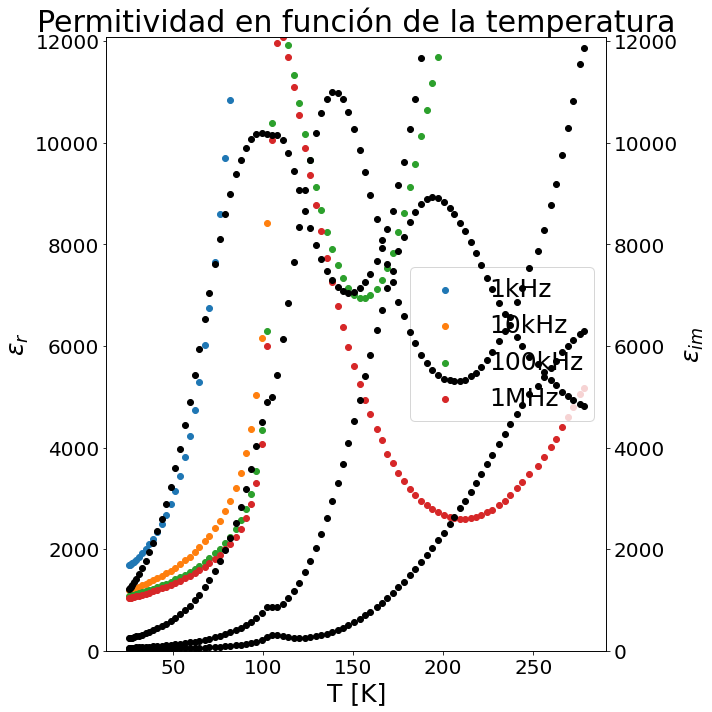

In [15]:
U=[PLT18CC, PLT22CC]

H=['1k','10k', '100k', '1M']

for u in U:
    fig, ax=plt.subplots(1,1, figsize=(10,10))
    ax2=ax.twinx()  #comando para usar dos ejes en el mismo gráfico.
    A=u['temp'].index[u['temp']==max(u['temp'])][0]


    for i in H:

        ax.scatter(u["temp"][0:A],u["e'{}Hz".format(i)][0:A], label="{}Hz".format(i))
        ax.set_ylim(0, max(u["e'{}Hz".format(i)][0:A])+0.1)
        ax2.set_ylim(0, max(u["e'{}Hz".format(i)][0:A])+0.1)
        ax2.scatter(u["temp"][0:A],u["e''{}Hz".format(i)][0:A], c='k')

        ax.set_xlabel('T [K]', fontsize=25)
        ax.set_ylabel(r'$\epsilon_r$', fontsize=25)
        ax2.set_ylabel(r'$\epsilon_{im}$', fontsize=25)
        ax.set_title(r'Permitividad en función de la temperatura', fontsize=30)
        ax.tick_params(axis='x', labelsize=20)
        ax.tick_params(axis='y', labelsize=20)
        ax2.tick_params(axis='y', labelsize=20)
        ax.grid()
        ax.legend(loc='best', fontsize=25)
        plt.tight_layout()  
        
plt.show()
    

In [6]:
def epsilonp(T,epsilon_m, T_m, Delta, xi): 
    return epsilon_m/(1+((T-T_m)/Delta)**xi)

### 2. Cargar (o generar) los datos a ajustar.
En este caso, no usaremos datos experimentales si no que los generaremos datos por medio de la funcion gaussiana, añadiendo ruido aleatorio por medio de la funcion random.


In [7]:
x=linspace(-10,10,101)
y=gaussiana(x,4,1,15)+abs(random.normal(0,0.2, x.size))

"""
random.normal(0,0.2, x.size) entrega un vector de valores aleatorios que siguen 
una distribuciín normal con media cero y desviación 0.2
"""

NameError: name 'linspace' is not defined

Grafiquemos los datos generados

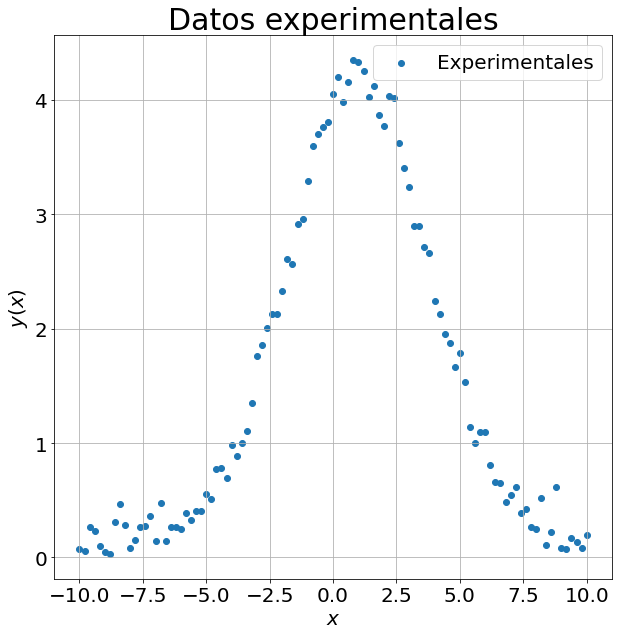

In [ ]:
import matplotlib.pyplot  as plt
Name='prueba'
fig, ax=plt.subplots(1,1,figsize=(10,10))      

ax.scatter(x,y,label='Experimentales')
#ax.errorbar(x, y, xerr=dx, yerr=dy, fmt='o-', ecolor='red', elinewidth=1, capsize=4, barsabove=True)

ax.set_xlabel('$x$', fontsize=20)
ax.set_ylabel('$y(x)$', fontsize=20)
ax.set_title('Datos experimentales', fontsize=30)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

#plt.legend(fontsize=20,loc=(0.7, 0.7))
ax.legend(fontsize=20,loc='best')


#texto = r'$y(x)=A e^{-\frac{(x-\mu)}{\sigma}}$'
#ax.text(-7.5, 3, texto, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

ax.grid()
plt.show()

fig.savefig('{}.svg'.format(Name), format="svg")

### 3. Hallar parámetros ajustados
Ahora inicializamos la funcion que usaremos para el ajuste, que es llamada scipy.optimize.curve_fit. Para ello creamos un array con valores aproximados para los argumentos de la gausiana que queremos ajustar, en este caso [amp,cen,anc]. Observe los datos experimentales y trate de ofrecer unos valores iniciales plausibles, de lo contrario puede que el ajuste no converge a una solución razonable.


In [ ]:
from scipy.optimize import curve_fit

val_ini = [1,0,1]
mej_val, cov = curve_fit(gaussiana,x,y,val_ini) 

""" 
mej_val entrega los valores ajustados en el orden que aparecen en la función.

cov es la matriz de covarianza de los parámetros ajustados, el error es la raiz cuadrada de los elementos
diagonales.

"""
print('mej_val: {}'.format(mej_val))

mej_val: [ 4.18285114  0.99172567 16.62361864]


Los valores obtenidos de mej_val, representan los argumentos que mejor ajustan la funcion gaussiana a los datos que usamos. Grafiquemos el ajuste contra los datos experimentales.

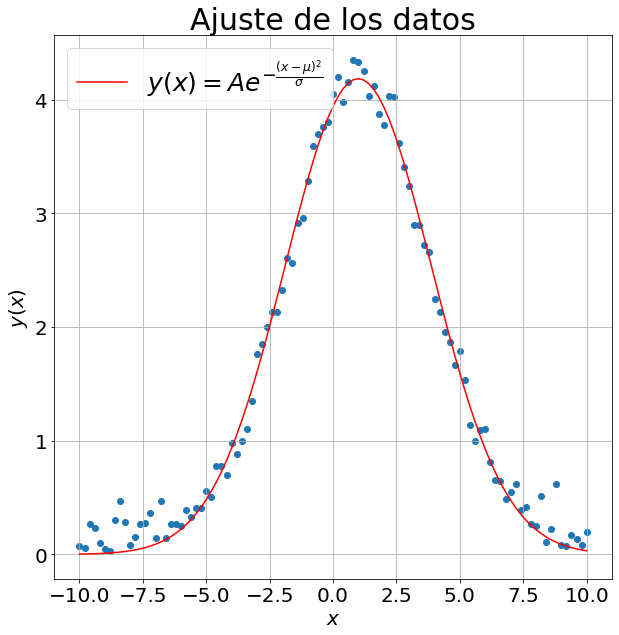

In [ ]:
Name='ajuste'

yaj=gaussiana(x,mej_val[0],mej_val[1],mej_val[2])

fig,ax=plt.subplots(1,1, figsize=(10,10))

ax.plot(x,yaj,'r',label=r'$y(x)=A e^{-\frac{(x-\mu)^2}{\sigma}}$')

ax.scatter(x,y)


ax.set_xlabel(r'$x$',fontsize=20)
ax.set_ylabel(r'$y(x)$',fontsize=20)
ax.set_title('Ajuste de los datos', fontsize=30)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)



#texto = r'$y(x)=A e^{-\frac{(x-\mu)}{\sigma}}$'

#ax.text(-7.5, 3, texto, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

ax.legend(fontsize=25, loc='best')
ax.grid()
plt.show()


fig.savefig('{}.svg'.format(Name), format="svg")

### 4. Determinar la bondad del ajuste.

Para esto usamos el coeficiente de determinación R^2.

In [ ]:
def r_sqr(datexp,dataj):
    return 1-sum((datexp-dataj)**2)/sum((datexp-mean(datexp))**2)

print('R^2 = ', r_sqr(y,yaj))


R^2 =  0.9910442934462885


El valor aqui obtenido es muy cercano a 1, lo que tambien verifica la bondad del ajuste obtenido.